In [1]:
import sys
sys.path.append('/home/gvolta/XENONnT/LedAnalysis/Script/Class')
from PMTanalysis import *
PMT = PMTanalyzer('/home/gvolta/XENONnT/LedAnalysis/Script/Class')

/home/gvolta/XENONnT/LedAnalysis/Script/Class/configuration.ini


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import matplotlib.colors as mcolors
#mpl.use('Agg')

In [3]:
import strax
print(strax.__version__)
import straxen
strax.Mailbox.DEFAULT_MAX_MESSAGES = 2
st = straxen.contexts.strax_SPE()

0.10.0


In [4]:
Config = cp.ConfigParser()
Config.read(PMT.config_file)

['/home/gvolta/XENONnT/LedAnalysis/Script/Class/configuration.ini']

## _Test of PMT analyzer class_

In [5]:
runs = st.select_runs(run_mode='LED*')

Checking data availability: 100%|██████████| 2/2 [00:12<00:00,  6.17s/it]


In [6]:
runs

,name,number,start,reader.ini.name,trigger.events_built,end,tags,mode,livetime,raw_records_available,event_info_available
104,180219_0952,16979,2018-02-19 09:52:13+00:00,LED_3mus_stable,196157.0,2018-02-19 10:00:16+00:00,"gain_step0,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
105,180219_1001,16980,2018-02-19 10:01:41+00:00,LED_3mus_stable,196207.0,2018-02-19 10:09:44+00:00,"gain_step1,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
106,180219_1011,16981,2018-02-19 10:11:06+00:00,LED_3mus_stable,194686.0,2018-02-19 10:19:09+00:00,"gain_step2,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
107,180219_1021,16982,2018-02-19 10:21:18+00:00,LED_3mus_stable,196373.0,2018-02-19 10:29:22+00:00,"gain_step3,_sciencerun2_candidate",LED_3mus_stable,00:08:04,True,False
108,180219_1030,16983,2018-02-19 10:31:02+00:00,LED_3mus_stable,195938.0,2018-02-19 10:39:05+00:00,"gain_step4,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
109,180219_1049,16985,2018-02-19 10:50:00+00:00,LED_3mus_stable,194366.0,2018-02-19 10:58:02+00:00,"spe_topbulk,_sciencerun2_candidate",LED_3mus_stable,00:08:02,True,False
110,180219_1059,16986,2018-02-19 10:59:21+00:00,LED_3mus_stable,193050.0,2018-02-19 11:07:24+00:00,"spe_topring,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
111,180219_1110,16987,2018-02-19 11:10:28+00:00,LED_7mus_stable,46116.0,2018-02-19 11:15:31+00:00,"Afterpulse,_sciencerun2_candidate",LED_7mus_stable,00:05:03,True,False
112,180219_1116,16988,2018-02-19 11:16:48+00:00,LED_7mus_stable,137431.0,2018-02-19 11:31:50+00:00,"Afterpulse,_sciencerun2_candidate",LED_7mus_stable,00:15:02,True,False


In [ ]:
st.data_info('raw_records')

In [ ]:
run_led = str(PMT.run_spe_topbulk)
run_noise = str(PMT.run_gain_step0)

In [ ]:
data_led_ = st.get_array(run_led, 'raw_records', seconds_range=(0,20))
data_led  = PMT.get_signal(data_led_)

In [ ]:
amplitude = PMT.get_amplitude(data_led)

In [ ]:
pmt = amplitude[amplitude['channel']==0]
plt.hist(pmt['amplitude'], bins=250, range=(0,500))
plt.yscale('log')
plt.show()
PMT_n = data_led[data_led['channel']==25]
event = 14
plt.plot(PMT_n['data'][event])

In [ ]:
def gaussian(x,*p) :
    # A gaussian peak with:
    #   Peak height above background : p[0]
    #   Central value                : p[1]
    #   Standard deviation           : p[2]
    return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))

ch = 100
amp = amplitude[amplitude['channel']==ch]['amplitude']

fit_input, binning, check = PMT.get_speinput(amplitude=amplitude, channel=[ch])
gauss, result_fit, fit_interval = PMT.get_sperough(amplitude=amplitude, channel=[ch])

plt.figure(figsize=(20,10))
H, B, _  = plt.hist(amp, bins=binning)
plt.plot(B[fit_input], H[fit_input], '*')
result_fit.plot_fit()

popt  = result_fit.best_values
N     = popt['g_amplitude']/(np.sqrt(2*np.pi)*popt['g_sigma'])
mu    = popt['g_center']
sigma = popt['g_sigma']

x = np.linspace(0,100, 100)
y = gaussian(x, N, mu, sigma)
plt.plot(x, y, 'k--')

plt.yscale('log')
plt.ylim(1e0)
plt.show()

In [ ]:
df_fit, df_led, window = PMT.get_ledwindow(amplitude=amplitude, channels=[i for i in range(249)])

In [ ]:
led_window   = [Config.getint('window_pars','led_windows_left'), Config.getint('window_pars','led_windows_right')]
noise_window = [Config.getint('window_pars','noise_windows_left'), Config.getint('window_pars','noise_windows_right')]

In [ ]:
window, led_window, noise_window

In [ ]:
plt.figure(figsize=(20,10))
###################################################################
PMT_n = data_led[data_led['channel']==25]
plt.subplot(211)
event = 14
plt.plot(PMT_n['data'][event])
plt.axvspan(led_window[0], led_window[1], alpha=0.5, color='gold')
plt.axvspan(noise_window[0], noise_window[1], alpha=0.5, color='lightblue')
plt.legend(loc='best', fontsize=15)
plt.ylim(bottom = -40)
plt.xlim(0, 600)
###################################################################
PMT_n = data_led[data_led['channel']==151]
plt.subplot(212)
event = 10
plt.plot(PMT_n['data'][event])
plt.axvspan(led_window[0], led_window[1], alpha=0.5, color='gold')
plt.axvspan(noise_window[0], noise_window[1], alpha=0.5, color='lightblue')
plt.legend(loc='best', fontsize=15)
plt.ylim(bottom = -40)
plt.xlim(0, 600)
###################################################################
plt.show()

In [ ]:
st = st.new_context(config=dict(led_window=(led_window[0],led_window[1]), 
                                noise_window=(noise_window[0], noise_window[1]),
                                channel_list=(0,36)))
st.show_config('led_calibration')

In [ ]:
st.data_info('led_calibration')

In [ ]:
data_spe = st.get_array(run_led, 'led_calibration', max_workers=10)

In [ ]:
pmt = data_spe[data_spe['channel']==0]
plt.hist(pmt['amplitude_led'], bins=250, range=(0,500))
plt.yscale('log')
plt.show()

In [ ]:
SPE = PMT.get_scalingspectrum(data_spe, data_spe, n_channel_s = np.arange(0, 5, 1))

In [ ]:
x = SPE[SPE['channel']==3]['bins led'][0]
x_led = 0.5 * (x[1:] + x[:-1])
plt.plot(x_led, 
         SPE[SPE['channel']==3]['spectrum led'][0],
         label='Amp LED')
x = SPE[SPE['channel']==3]['bins noise'][0]
x_noise = 0.5 * (x[1:] + x[:-1])
plt.plot(x_noise, 
         SPE[SPE['channel']==3]['spectrum noise'][0], 
         label='Amp noise')
plt.yscale('log')
plt.show()

In [ ]:
SPE_acceptance = PMT.get_speacceptance(data_spe, data_spe, n_channel_s = np.arange(0, 5, 1))

In [ ]:
bin_correction = 7
print('#################################################')
print('############### Bin Correction: '+str(bin_correction)+' ###############')
print('#################################################')

fig = plt.figure(figsize=(25,10))
n_channel = 4
mask = np.where(SPE_acceptance[SPE_acceptance['channel']==n_channel]['SPE acceptance '+str(bin_correction)+' bin'][0]<0.01)
x_max = SPE_acceptance[SPE_acceptance['channel']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0][mask][0]

plt.subplot(121)

x = SPE[SPE['channel']==n_channel]['bins led'][0]
x_led = 0.5 * (x[1:] + x[:-1])
plt.plot(x_led, 
         SPE[SPE['channel']==n_channel]['spectrum led'][0],
         label='Amp LED')
x = SPE[SPE['channel']==n_channel]['bins noise'][0]
x_noise = 0.5 * (x[1:] + x[:-1])
plt.plot(x_noise, 
         SPE[SPE['channel']==n_channel]['spectrum noise'][0], 
         label='Amp noise')

plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.yscale('log')
plt.legend(loc='best', fontsize=20)

plt.subplot(122)

x = SPE[SPE['channel']==n_channel]['bins led'][0]
x_led = 0.5 * (x[1:] + x[:-1])
plt.plot(x_led, 
         SPE[SPE['channel']==n_channel]['spectrum led'][0],
         label='Amp LED')
x = SPE[SPE['channel']==n_channel]['bins noise'][0]
x_noise = 0.5 * (x[1:] + x[:-1])
plt.plot(x_noise, 
         SPE[SPE['channel']==n_channel]['spectrum noise scaled '+str(bin_correction)+' bin'][0], 
         label='Amp noise')

plt.xlim(right=30)
plt.yscale('log')
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=20)


fig = plt.figure(figsize=(25,10))

plt.subplot(121)

plt.errorbar(x = SPE_acceptance[SPE_acceptance['channel']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
             y = SPE_acceptance[SPE_acceptance['channel']==n_channel]['noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
             yerr = SPE_acceptance[SPE_acceptance['channel']==n_channel]['error of noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
             fmt='b+', label='noise-subtracted SPE spectrum')

#plt.xlim(left = 0)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=17)

plt.subplot(122)

plt.plot(SPE_acceptance[SPE_acceptance['channel']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
         SPE_acceptance[SPE_acceptance['channel']==n_channel]['SPE acceptance '+str(bin_correction)+' bin'][0]) 

plt.text(55, 1.07, 
         'Acceptance @ 15 ADC = %.2f'%(SPE_acceptance[SPE_acceptance['channel']==n_channel]['Acceptance @ 15 ADC '+str(bin_correction)+' bin'][0]),
         horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), 
         fontsize=17)

plt.text(55, 1, 
         'ADC for 0.9 acceptance = %.2f'%(SPE_acceptance[SPE_acceptance['channel']==n_channel]['Threshold for 0.9 acceptance '+str(bin_correction)+' bin'][0]), 
         horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), 
         fontsize=17)

plt.hlines(y=0.9, xmin=0, xmax=x_max, colors='k', linestyles='dashed')
plt.vlines(x=15, ymin=0, ymax=1, colors='k', linestyles='dashed')
plt.title('Acceptance', fontsize=26)
plt.ylim(0,1.1)
plt.xlim(0, x_max)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
#plt.legend(loc='best', fontsize=15)

plt.show()

## Gain

In [7]:
led_window   = [Config.getint('window_pars','led_windows_left'), 
                Config.getint('window_pars','led_windows_right')]
noise_window = [Config.getint('window_pars','noise_windows_left'), 
                Config.getint('window_pars','noise_windows_right')]

In [8]:
st = st.new_context(config=dict(led_window=(led_window[0],led_window[1]), 
                                noise_window=(noise_window[0], noise_window[1]),
                                channel_list=(127,248)))
st.show_config('led_calibration')

,option,default,current,applies_to,help
0,baseline_window,"(0, 50)",<OMITTED>,"(led_calibration,)",Window (samples) for baseline calculation.
1,led_window,"(50, 115)","(143, 180)","(led_calibration,)",Window (samples) where we expect the signal in LED calibration
2,noise_window,"(120, 185)","(50, 87)","(led_calibration,)",Window (samples) to analysis the noise
3,channel_list,"(0, 248)","(127, 248)","(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
4,pax_raw_dir,/data/xenon/raw,<OMITTED>,"(raw_records,)",Directory with raw pax datasets
5,stop_after_zips,0,<OMITTED>,"(raw_records,)",Convert only this many zip files. 0 = all.
6,events_per_chunk,50,<OMITTED>,"(raw_records,)",Number of events to yield per chunk
7,samples_per_record,110,<OMITTED>,"(raw_records,)",Number of samples per record


In [9]:
run_gain_step1 = str(PMT.run_gain_step1)
run_gain_step0 = str(PMT.run_gain_step0)

In [10]:
data_gs1 = st.get_array(run_gain_step1, 'led_calibration', max_workers=10)


In [11]:
data_noise = st.get_array(run_gain_step0, 'led_calibration', max_workers=10)

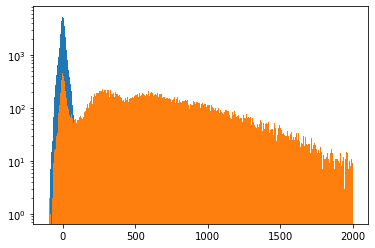

In [12]:
plt.hist(data_noise[data_noise['channel']==127]['area'], bins=2000, range=[-100, 2000])
plt.hist(data_gs1[data_gs1['channel']==127]['area'], bins=2000, range=[-100, 2000])
plt.yscale('log')
plt.show()

In [13]:
channels = np.linspace(127, 248, 121, dtype=int)
moments_s = PMT.get_moments(data_gs1, channels)
moments_b = PMT.get_moments(data_noise, channels)

In [14]:
channels = np.linspace(127, 129, 3, dtype=int)
O = PMT.get_occupancy(data_gs1, data_noise, channels)

In [15]:
channels = np.linspace(127, 131, 3, dtype=int)
Gain = PMT.get_gain(data_gs1, data_noise, channels)

/home/gvolta/XENONnT/LedAnalysis/Script/Class/PMTanalysis.py:565: RuntimeWarning: invalid value encountered in sqrt
  gain_err = self.convert_to_gain(np.sqrt(EPsi_stat_err)) + self.convert_to_gain(EPsi_sys_err)


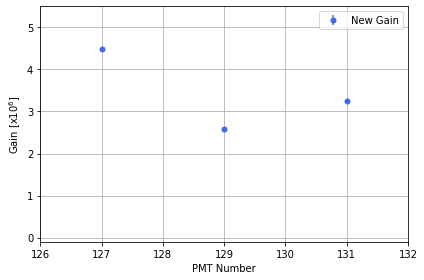

In [16]:
plt.errorbar(Gain['channel'], Gain['gain'], yerr=Gain['gain error'], linestyle = '', fmt='o', markersize=5, color='royalblue', label='New Gain')
plt.xlabel('PMT Number')
plt.ylabel('Gain [x10$^6$]')
plt.ylim(-0.1,5.5)
plt.xlim(126,132)
plt.legend()
plt.grid()
plt.tight_layout()